## Rayleigh Random Variable

Consider two independent and identically distributed (iid) Gaussian random variables, denoted as $ X_1 $ and $ X_2 $, each following a normal distribution with mean zero and variance $ \sigma^2 $, i.e.,  

$$
X_1, X_2 \sim \mathcal{N}(0, \sigma^2).
$$

The random variable $ X $, defined as  

$$
X = \sqrt{X_1^2 + X_2^2},
$$

follows a Rayleigh distribution.  

### Probability Density Function (PDF)  

The probability density function (PDF) of a Rayleigh-distributed random variable is given by  

$$
f_X(x) =
\begin{cases} 
\frac{x}{\sigma^2} \exp\left(-\frac{x^2}{2\sigma^2}\right), & x > 0, \\  
0, & \text{otherwise}.
\end{cases}
$$

In the Rayleigh probability density function (PDF), the parameter $ \sigma $ is known as the **scale parameter**. It determines the spread of the distribution and affects both the peak and tail behavior of the PDF.

Mathematically, in the Rayleigh PDF given above, $ \sigma $ controls the dispersion of the distribution. 

### Expected Value and Variance  

The expected value and variance of $ X $ are given by  

$$
\mathbb{E}[X] = \sigma \sqrt{\frac{\pi}{2}}, \quad \text{Var}(X) = \left( 2 - \frac{\pi}{2} \right) \sigma^2.
$$

### Cumulative Distribution Function (CDF)  

The cumulative distribution function (CDF) of a Rayleigh-distributed random variable is expressed as  

$$
F_X(x) =
\begin{cases}
1 - \exp\left(-\frac{x^2}{2\sigma^2}\right), & x > 0, \\  
0, & \text{otherwise}.
\end{cases}
$$

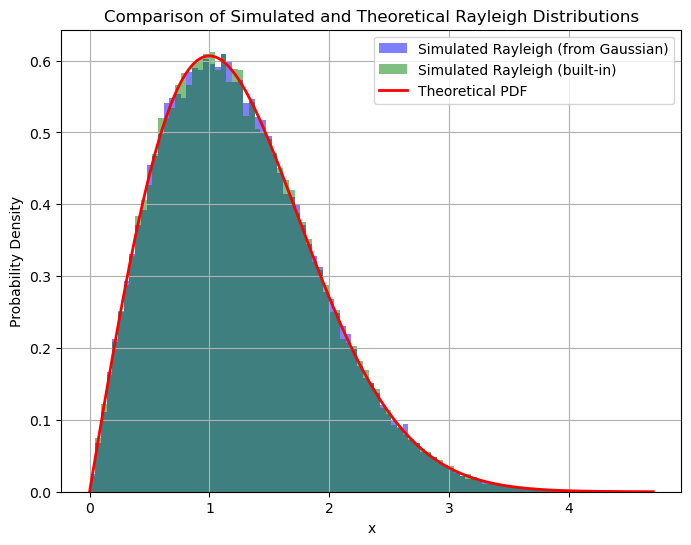

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rayleigh

# Set parameters
sigma = 1  # Standard deviation of Gaussian variables
num_samples = 100000  # Number of samples

# Generate Rayleigh RV from two Gaussian RVs
X1 = np.random.normal(0, sigma, num_samples)
X2 = np.random.normal(0, sigma, num_samples)
rayleigh_simulated = np.sqrt(X1**2 + X2**2)

# Generate Rayleigh RV using built-in function
rayleigh_builtin = rayleigh.rvs(scale=sigma, size=num_samples)

# Define bins for histogram
bins = np.linspace(0, np.max(rayleigh_simulated), 100)

# Compute theoretical PDF
x_vals = np.linspace(0, np.max(rayleigh_simulated), 1000)
theoretical_pdf = (x_vals / sigma**2) * np.exp(-x_vals**2 / (2 * sigma**2))

# Plot the results
plt.figure(figsize=(8, 6))

# Histogram for numerically estimated PDFs
plt.hist(rayleigh_simulated, bins, density=True, alpha=0.5, label="Simulated Rayleigh (from Gaussian)", color='blue')
plt.hist(rayleigh_builtin, bins, density=True, alpha=0.5, label="Simulated Rayleigh (built-in)", color='green')

# Plot theoretical PDF
plt.plot(x_vals, theoretical_pdf, 'r-', linewidth=2, label="Theoretical PDF")

# Labels and title
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.title("Comparison of Simulated and Theoretical Rayleigh Distributions")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


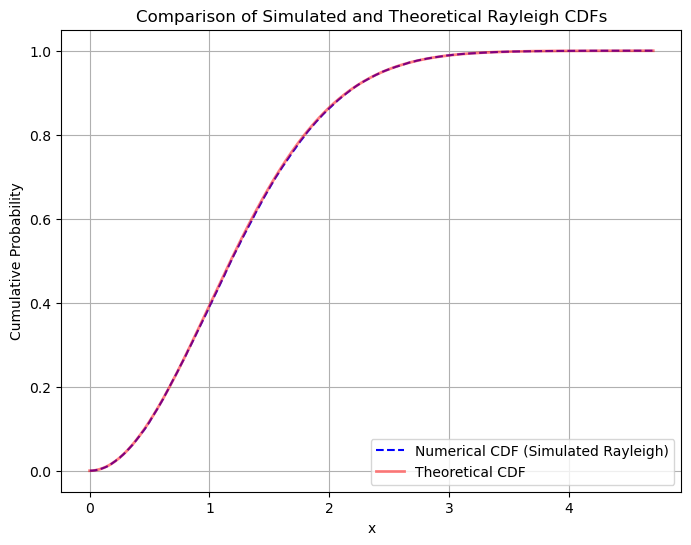

In [18]:
# Compute numerical CDF from simulated Rayleigh (from Gaussian)
sorted_rayleigh_simulated = np.sort(rayleigh_simulated)
num_cdf = np.arange(1, num_samples + 1) / num_samples

# Compute theoretical CDF
theoretical_cdf = 1 - np.exp(-x_vals**2 / (2 * sigma**2))

# Plot the results
plt.figure(figsize=(8, 6))

# Plot numerical CDF as a histogram
plt.plot(sorted_rayleigh_simulated, num_cdf, label="Numerical CDF (Simulated Rayleigh)", color='blue', linestyle='--')

# Plot theoretical CDF
plt.plot(x_vals, theoretical_cdf, label="Theoretical CDF", color='red', linewidth=2, alpha=0.5)

# Labels and title
plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.title("Comparison of Simulated and Theoretical Rayleigh CDFs")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [19]:
# Compute numerical mean and variance from simulated Rayleigh (from Gaussian)
numerical_mean = np.mean(rayleigh_simulated)
numerical_variance = np.var(rayleigh_simulated)

# Compute theoretical mean and variance based on given expressions
theoretical_mean = sigma * np.sqrt(np.pi / 2)
theoretical_variance = (2 - np.pi / 2) * sigma**2

# Create a DataFrame for display
data = {
    "Statistic": ["Mean", "Variance"],
    "Numerical (Simulated)": [numerical_mean, numerical_variance],
    "Theoretical": [theoretical_mean, theoretical_variance]
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)


  Statistic  Numerical (Simulated)  Theoretical
0      Mean               1.257428     1.253314
1  Variance               0.430243     0.429204


##### Illustrate the impact of the parameter $\sigma$

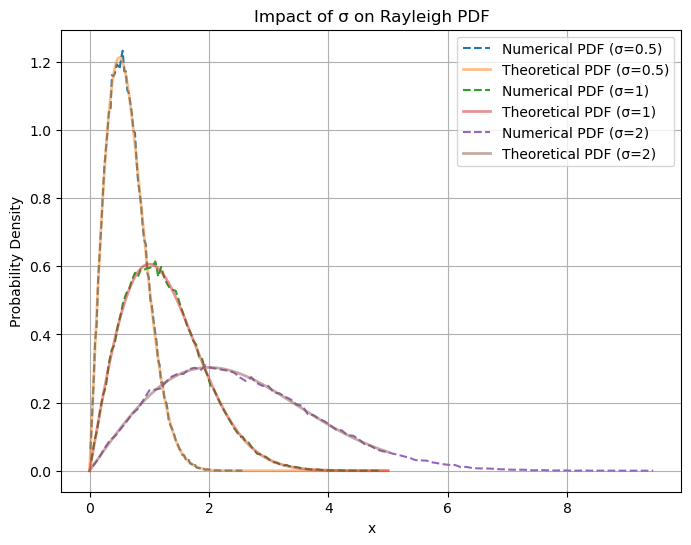

In [20]:
# Define different sigma values to analyze their impact
sigma_values = [0.5, 1, 2]

# Set number of samples
num_samples = 100000

# Define x-values for theoretical PDFs and CDFs
x_vals = np.linspace(0, 5, 1000)

# Create a figure for PDF comparison
plt.figure(figsize=(8, 6))

for sigma in sigma_values:
    # Simulate Rayleigh from Gaussian for different sigma values
    X1 = np.random.normal(0, sigma, num_samples)
    X2 = np.random.normal(0, sigma, num_samples)
    rayleigh_simulated = np.sqrt(X1**2 + X2**2)

    # Compute histogram for numerical PDF
    hist_vals, bins = np.histogram(rayleigh_simulated, bins=100, density=True)
    bin_centers = (bins[:-1] + bins[1:]) / 2

    # Compute theoretical PDF
    theoretical_pdf = (x_vals / sigma**2) * np.exp(-x_vals**2 / (2 * sigma**2))

    # Plot numerical PDF
    plt.plot(bin_centers, hist_vals, linestyle='dashed', label=f"Numerical PDF (σ={sigma})")

    # Plot theoretical PDF
    plt.plot(x_vals, theoretical_pdf, linewidth=2, label=f"Theoretical PDF (σ={sigma})", alpha=0.5)

# Labels and legend
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.title("Impact of σ on Rayleigh PDF")
plt.legend()
plt.grid(True)
plt.show()


A larger $ \sigma $ results in a wider spread, shifting the peak of the distribution to the right, while a smaller $ \sigma $ makes the distribution more concentrated around smaller $ x $-values.

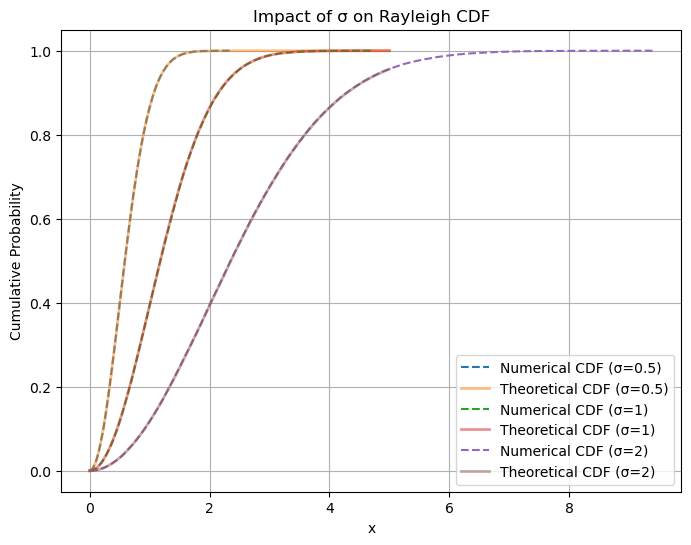

In [21]:

# Create a figure for CDF comparison
plt.figure(figsize=(8, 6))

for sigma in sigma_values:
    # Simulate Rayleigh from Gaussian for different sigma values
    X1 = np.random.normal(0, sigma, num_samples)
    X2 = np.random.normal(0, sigma, num_samples)
    rayleigh_simulated = np.sqrt(X1**2 + X2**2)

    # Compute empirical CDF
    sorted_rayleigh_simulated = np.sort(rayleigh_simulated)
    num_cdf = np.arange(1, num_samples + 1) / num_samples

    # Compute theoretical CDF
    theoretical_cdf = 1 - np.exp(-x_vals**2 / (2 * sigma**2))

    # Plot numerical CDF
    plt.plot(sorted_rayleigh_simulated, num_cdf, linestyle='dashed', label=f"Numerical CDF (σ={sigma})")

    # Plot theoretical CDF
    plt.plot(x_vals, theoretical_cdf, linewidth=2, label=f"Theoretical CDF (σ={sigma})", alpha=0.5)

# Labels and legend
plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.title("Impact of σ on Rayleigh CDF")
plt.legend()
plt.grid(True)
plt.show()